In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.13.0+cu117
True


In [2]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
x.shape

torch.Size([12])

In [4]:
# 元素的总数
x.numel()

12

In [5]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [6]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [8]:
x = torch.tensor([[1,2], [3,4]])
x.shape

torch.Size([2, 2])

In [9]:
# 运算
x = torch.tensor([1.0, 2, 3])
y = torch.tensor([2,2,2])
x+y, x/y, x**y, torch.exp(x) #指数运算

(tensor([3., 4., 5.]),
 tensor([0.5000, 1.0000, 1.5000]),
 tensor([1., 4., 9.]),
 tensor([ 2.7183,  7.3891, 20.0855]))

In [10]:
# 张量连接
x = torch.arange(12, dtype=torch.float32).reshape((3,4))
y = torch.tensor([[1,1,1,1],[2,2,2,2],[3,3,3,3]])

torch.cat((x,y), dim=0), torch.cat([x,y], dim=1).dtype

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 1.,  1.,  1.,  1.],
         [ 2.,  2.,  2.,  2.],
         [ 3.,  3.,  3.,  3.]]),
 torch.float32)

In [11]:
x==y

tensor([[False,  True, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [12]:
y.sum() # > 标量

tensor(24)

In [13]:
# 广播机制
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [14]:
a + b

# 广播机制

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [15]:
# 等同于
a = torch.cat((a,a), dim=1)
b = torch.cat((b,b,b), dim=0)
a, b 

(tensor([[0, 0],
         [1, 1],
         [2, 2]]),
 tensor([[0, 1],
         [0, 1],
         [0, 1]]))

In [16]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [17]:
# 元素访问
x

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [18]:
x[0,0], x[1,1], x[-1], x[1:4] # 越界未报错

(tensor(0.),
 tensor(5.),
 tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [19]:
# 赋值
x[0,0] = 10
x

tensor([[10.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [20]:
x[0:2, 1:3]=2
x

tensor([[10.,  2.,  2.,  3.],
        [ 4.,  2.,  2.,  7.],
        [ 8.,  9., 10., 11.]])

In [21]:
# python 引用 id的问题
q=torch.ones(12).reshape((3,4))
w=torch.arange(12).reshape((3,4))
before = id(q)
q = q+w
id(q)==before
# false 表示q的原本的内存被释放了，q被析构掉了，但是如果数据量大的话会十分浪费时间


False

In [22]:
# 执行原地操作
e = torch.zeros_like(q)
before = id(e)
e[:]=q+w
before, id(e)

(1673253670088, 1673253670088)

In [23]:
# 如果后续没有重复使用q
q=torch.ones(12).reshape((3,4))
w=torch.arange(12).reshape((3,4))
before = id(q)
q += w # 或 q[:] = q+w
id(q)==before

True

In [24]:
# numpy trans tensor
a = x.numpy()
x, a, torch.tensor(a)

(tensor([[10.,  2.,  2.,  3.],
         [ 4.,  2.,  2.,  7.],
         [ 8.,  9., 10., 11.]]),
 array([[10.,  2.,  2.,  3.],
        [ 4.,  2.,  2.,  7.],
        [ 8.,  9., 10., 11.]], dtype=float32),
 tensor([[10.,  2.,  2.,  3.],
         [ 4.,  2.,  2.,  7.],
         [ 8.,  9., 10., 11.]]))

In [25]:
# 将大小为1的张量转为python标量
a = x[0,1]
a, a.item(), float(a), int(a)

(tensor(2.), 2.0, 2.0, 2)

# 数据预处理

In [26]:
import os

os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'c1.csv')
with open(data_file, 'w') as f:
    f.write('q1,q2,q3\n')
    f.write('NA,cheng,100\n')
    f.write('2,zhao,95\n')
    f.write('3,NA,100\n')
    f.write('NA,NA,80\n')

In [27]:
import pandas as pd

data = pd.read_csv(data_file)
data

,q1,q2,q3
0,NaN,cheng,100
1,2.0,zhao,95
2,3.0,NaN,100
3,NaN,NaN,80


In [28]:
# 线性代数的表示
# 标量 向量 矩阵 张量


import torch

a = torch.arange(24).reshape((2,3,4))
a

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [29]:
b = a.clone()
b

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [30]:
b.sum()

tensor(276)

In [31]:
sum_b = b.sum(axis=0, keepdim=True)
b / sum_b


tensor([[[0.0000, 0.0714, 0.1250, 0.1667],
         [0.2000, 0.2273, 0.2500, 0.2692],
         [0.2857, 0.3000, 0.3125, 0.3235]],

        [[1.0000, 0.9286, 0.8750, 0.8333],
         [0.8000, 0.7727, 0.7500, 0.7308],
         [0.7143, 0.7000, 0.6875, 0.6765]]])

In [32]:
# 向量乘积
a = torch.arange(4)
b = a.clone()
torch.dot(a ,b)


tensor(14)

In [33]:
# 矩阵乘积
a = torch.arange(20).reshape((4,5))
b = torch.arange(4).reshape((1,4)) 
c = torch.arange(5)
print(a, b, c)

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]) tensor([[0, 1, 2, 3]]) tensor([0, 1, 2, 3, 4])


In [34]:
torch.mv(a ,c)

tensor([ 30,  80, 130, 180])

In [35]:
torch.mm(b ,a)

tensor([[70, 76, 82, 88, 94]])

In [36]:
torch.mm(a, torch.ones((5,3)))

RuntimeError: expected scalar type Long but found Float

In [ ]:
torch.ones(5,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
a = torch.arange(24).reshape((2,3,4))
a

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [ ]:
a.sum(axis=[0,1])

tensor([60, 66, 72, 78])

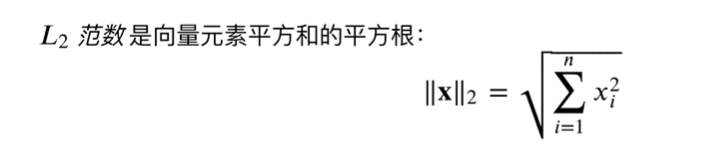

In [ ]:
# 范数
u = torch.tensor([3.0, -4])
torch.norm(u)

tensor(5.)

![Alt text](image.png)

In [ ]:
torch.abs(u).sum()

tensor(7.)

![Alt text](image-1.png)

In [ ]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

In [ ]:
# 按轴的sum
# axis=0 相当于丢弃掉shape [4, 5]中的4, keepdim=True 相当于不是丢掉而是变为1    
a = torch.ones((4,5))
a.sum(axis=[0,1])
a.sum(axis=0, keepdim=True)


tensor([[4., 4., 4., 4., 4.]])

In [ ]:
b = torch.ones((2,5,4))
# keepdim 丢弃与变为1
b.shape, b.sum(axis=0).shape, b.sum(axis=0, keepdim=True).shape

(torch.Size([2, 5, 4]), torch.Size([5, 4]), torch.Size([1, 5, 4]))

In [39]:
f = nn.ReLU()
f(torch.tensor([-1,2]))

tensor([0, 2])

In [40]:
import torch
import torch.nn as nn

In [42]:
class cnntest(nn.Module):
    def __init__(self) -> None:
        super(cnntest, self).__init__()
        self.l1 = nn.Linear(10, 5)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        return x
    
model = cnntest()
input_data = torch.randn(3, 10)
print(input_data)
print(model(input_data))

tensor([[ 0.7511,  0.0119,  0.5656, -1.2205, -2.4763,  1.1296, -0.2478,  1.1829,
         -0.7973, -1.1671],
        [-0.9741,  1.0439,  2.5149,  0.6545,  0.9303, -1.0817,  0.0347, -0.0848,
          0.3493,  0.9687],
        [-0.8564,  0.6687, -0.6063,  0.1403, -0.6397, -0.1700,  0.0148, -0.4763,
          0.5176, -0.0682]])
tensor([[0.0000, 0.9419, 0.0000, 0.0000, 0.0000],
        [0.0000, 1.0543, 0.0332, 0.0000, 0.0000],
        [0.2600, 0.1634, 0.2174, 0.4295, 0.0000]], grad_fn=<ReluBackward0>)
